In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print("length: ", len(train_data), len(test_data))
print("training data 0: ", train_data[0])
print("training label 0: ", train_labels[0])

length:  8982 2246
training data 0:  [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
training label 0:  3


In [3]:
# Decoding newswires back to text

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire =  ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [4]:
# Prepare the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# built-in method
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [18]:
"""
With integer labels, you should use sparse_categorical_crossentropy as the choice of loss function. This new loss function
is still mathematically the same as categorical_crossentropy; it just has a different interface.
"""

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
y_train_array = np.array(train_labels)
y_test_array = np.array(test_labels)

print(train_labels,  np.shape(train_labels),  type(train_labels),  test_labels,  np.shape(test_labels),  type(test_labels))
print(y_train_array, np.shape(y_train_array), type(y_train_array), y_test_array, np.shape(y_test_array), type(y_test_array))

[ 3  4  3 ... 25  3 25] (8982,) <class 'numpy.ndarray'> [ 3 10  1 ...  3  3 24] (2246,) <class 'numpy.ndarray'>
[ 3  4  3 ... 25  3 25] (8982,) <class 'numpy.ndarray'> [ 3 10  1 ...  3  3 24] (2246,) <class 'numpy.ndarray'>


In [5]:
from keras import models
from keras import layers

# Model definition
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Setting aside the valida data
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 275us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 87us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 85us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 85us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 85us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 85us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 85us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020
Epoch 

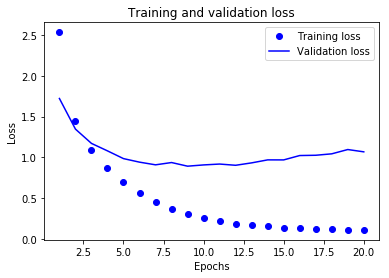

In [7]:
# Ploting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

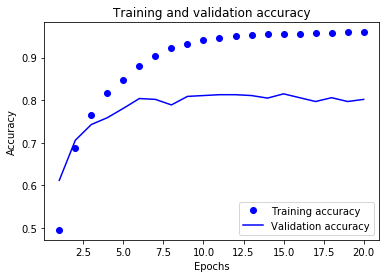

In [8]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
"""
The neural network begins to overfit after nine epochs. Let’s train a new network from scratch for 9 epochs
and then evaluate it on the test set
"""

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 110us/step - loss: 2.8046 - acc: 0.5038 - val_loss: 1.8434 - val_acc: 0.6300
Epoch 2/9
7982/7982 [==============================] - 1s 81us/step - loss: 1.5257 - acc: 0.6957 - val_loss: 1.3306 - val_acc: 0.7110
Epoch 3/9
7982/7982 [==============================] - 1s 81us/step - loss: 1.1114 - acc: 0.7710 - val_loss: 1.1391 - val_acc: 0.7460
Epoch 4/9
7982/7982 [==============================] - 1s 80us/step - loss: 0.8715 - acc: 0.8160 - val_loss: 1.0309 - val_acc: 0.7840
Epoch 5/9
7982/7982 [==============================] - 1s 81us/step - loss: 0.7030 - acc: 0.8477 - val_loss: 0.9683 - val_acc: 0.8020
Epoch 6/9
7982/7982 [==============================] - 1s 80us/step - loss: 0.5660 - acc: 0.8753 - val_loss: 0.9421 - val_acc: 0.7980
Epoch 7/9
7982/7982 [==============================] - 1s 80us/step - loss: 0.4567 - acc: 0.9070 - val_loss: 0.9238 - val_acc: 0.7970
Epoch 8/9
798

In [12]:
# Pure random classifier
import copy

test_label_copy = copy.copy(test_labels)
np.random.shuffle(test_label_copy)
hits_array = np.array(test_labels) == np.array(test_label_copy)
print(float(np.sum(hits_array)) / len(test_labels))

0.19857524487978628


In [13]:
# Generate predictions on new data

predictions = model.predict(x_test)
print(predictions[0], predictions[0].shape, np.sum(predictions[0]))

# The largest entry is the predicted class—the class with the highest probability
print(np.argmax(predictions[0]))

[8.5719184e-05 2.4996716e-05 9.4314663e-07 9.8640358e-01 9.9298973e-03
 5.9935297e-07 2.3874200e-05 2.3013212e-05 2.3117752e-04 9.6469394e-06
 3.0606934e-05 1.4633703e-04 4.3361561e-05 7.2926123e-05 2.3711982e-05
 9.4637899e-06 2.2908160e-04 3.1090062e-06 1.2971805e-06 3.4364144e-04
 6.9634931e-04 6.0048839e-04 2.4142664e-06 1.2873497e-04 2.1346228e-05
 9.8519122e-06 9.1157483e-07 1.3968605e-05 4.3646564e-06 2.9517889e-05
 2.1927404e-05 2.3864557e-04 2.8983136e-06 1.1310050e-05 3.3330460e-04
 8.4673098e-07 3.0448413e-05 6.4117085e-06 1.5544603e-05 1.5666783e-04
 2.3043538e-07 1.7298495e-05 3.2042326e-06 1.5070715e-05 1.1121490e-07
 1.1559719e-06] (46,) 0.99999994
3


In [19]:
"""
The importance of having sufficiently large intermediate layers

This drop is mostly due to the fact that you’re trying to compress a lot of information (enough information to recover the separation
hyperplanes of 46 classes) into an intermediate space that is too low-dimensional. The network is able to cram most of the necessary
information into these eight-dimensional representations, but not all of it.
"""

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 78us/step - loss: 2.7629 - acc: 0.4734 - val_loss: 1.9887 - val_acc: 0.6020
Epoch 2/20
7982/7982 [==============================] - 0s 50us/step - loss: 1.6327 - acc: 0.6339 - val_loss: 1.5277 - val_acc: 0.6380
Epoch 3/20
7982/7982 [==============================] - 0s 50us/step - loss: 1.3069 - acc: 0.6894 - val_loss: 1.3917 - val_acc: 0.6600
Epoch 4/20
7982/7982 [==============================] - 0s 50us/step - loss: 1.1489 - acc: 0.7223 - val_loss: 1.3313 - val_acc: 0.6760
Epoch 5/20
7982/7982 [==============================] - 0s 50us/step - loss: 1.0327 - acc: 0.7479 - val_loss: 1.3140 - val_acc: 0.6850
Epoch 6/20
7982/7982 [==============================] - 0s 50us/step - loss: 0.9385 - acc: 0.7707 - val_loss: 1.2850 - val_acc: 0.7020
Epoch 7/20
7982/7982 [==============================] - 0s 50us/step - loss: 0.8509 - acc: 0.7909 - val_loss: 1.2912 - val_acc: 0.6990
Epoch 8

In [ ]:
"""
Summaries:


1. If you’re trying to classify data points among N classes, your network should end with a Dense layer of size N.

2. In a single-label, multiclass classification problem, your network should end with a softmax activation so that it will
   output a probability distribution over the N output classes.
   
3. Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between
   the probability distributions output by the network and the true distribution of the targets.

4. There are two ways to handle labels in multiclass classification:
   – Encoding the labels via categorical encoding (also known as one-hot encoding) and using categorical_crossentropy as a loss function
   – Encoding the labels as integers and using the sparse_categorical_crossentropy loss function
   
5. If you need to classify data into a large number of categories, you should avoid creating information bottlenecks in your network
   due to intermediate layers that are too small. 
"""